# Exploratory Data Analysis

### Understanding the characteristics of data is essential before modeling building.   Based on the metrics we gather here, we will decide which classification model we should use for this dataset.

1.  Number of samples
2.  Number of classes
3.  Number of samples per class
4.  Number of words per sample
5.  Frequency distribution of words
6.  Distribution of sample length

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer

sys.path.append(os.path.abspath("../"))
from src.data.make_dataset import (load_roman_urdu_sentiment_analysis_dataset, tokenizer)
from src.visualization.visualize import (plot_frequency_distribution_of_ngrams, plot_sample_length_distribution)

DATA_DIR = os.path.abspath('../data/raw')

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [3]:
((train_comments, train_labels), (test_comments, test_labels)) = load_roman_urdu_sentiment_analysis_dataset(DATA_DIR, 'Roman Urdu DataSet.csv', ['comment', 'sentiment', 'nan'])

In [4]:
labels = np.concatenate((train_labels, test_labels))

## Q1. Number of samples

In [5]:
print(f'There are {labels.shape[0]} examples in this dataset')

There are 20116 examples in this dataset


## Q2. Number of classes

In [6]:
print(f'There are {np.unique(labels).shape[0]} classes in this dataset')

There are 3 classes in this dataset


## Q3.  Number of samples per class

In [7]:
unique_values, occurCount = np.unique(labels, return_counts=True)
print(f'There are {occurCount[0]} examples of negative sentiment')
print(f'There are {occurCount[1]} examples of neutral sentiment')
print(f'There are {occurCount[2]} examples of positive sentiment')

There are 5287 examples of negative sentiment
There are 8816 examples of neutral sentiment
There are 6013 examples of positive sentiment


## Q4.  Number of words per sample

In [8]:
comments = train_comments + test_comments
tokenize_length = [len((lambda x: tokenizer(x))(x).split()) for x in comments]
print(f'The median number of words per sample: {np.median(tokenize_length)}')

The median number of words per sample: 9.0


## Q5. Frequency distribution of words

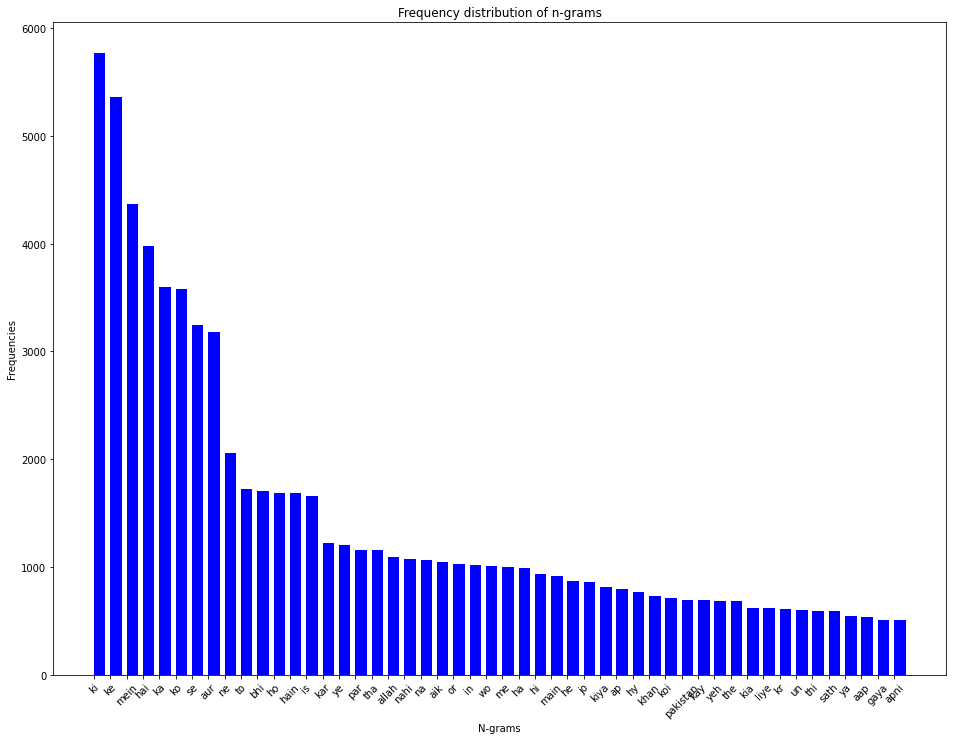

In [9]:
plot_frequency_distribution_of_ngrams(comments, ngram_range=(1, 2), num_ngrams=50)

## Q6. Distribution of sample length

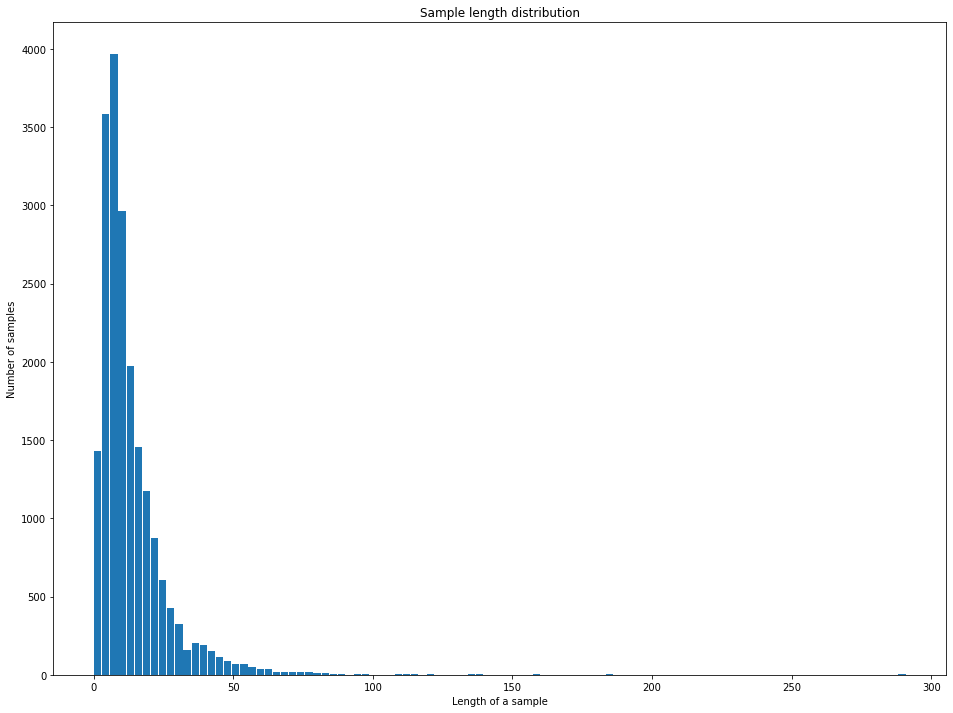

In [10]:
plot_sample_length_distribution(tokenize_length)